In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies=pd.read_csv(r"B:\docs\Data Analysis\DataSets\movies.csv")
ratings=pd.read_csv(r"B:\docs\Data Analysis\DataSets\ratings.csv")

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,169,2.5,1204927694
1,1,2471,3.0,1204927438
2,1,48516,5.0,1204927435
3,2,2571,3.5,1436165433
4,2,109487,4.0,1436165496


In [5]:
num_users = ratings['userId'].nunique()
print("Total number of users:", num_users)

Total number of users: 247753


In [6]:
num_movies = ratings['movieId'].nunique()
print("Total number of movies:", num_movies)

Total number of movies: 33670


In [7]:
rating_counts = ratings['rating'].value_counts().sort_index()
print("\nRatings distribution:\n", rating_counts)


Ratings distribution:
 rating
0.5     315651
1.0     769654
1.5     337605
2.0    1603254
2.5    1044176
3.0    4783899
3.5    2592375
4.0    6265623
4.5    1813922
5.0    3358218
Name: count, dtype: int64


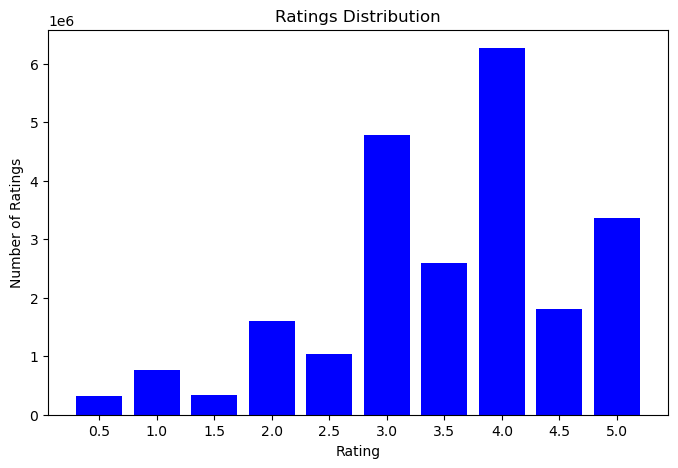

In [8]:
plt.figure(figsize=(8,5))
plt.bar(rating_counts.index.astype(str), rating_counts.values, color='blue')
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.show()

In [9]:
data=pd.merge(ratings, movies, on='movieId')
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,169,2.5,1204927694,Free Willy 2: The Adventure Home (1995),Adventure|Children|Drama
1,1,2471,3.0,1204927438,Crocodile Dundee II (1988),Action|Adventure|Comedy
2,1,48516,5.0,1204927435,"Departed, The (2006)",Crime|Drama|Thriller
3,2,2571,3.5,1436165433,"Matrix, The (1999)",Action|Sci-Fi|Thriller
4,2,109487,4.0,1436165496,Interstellar (2014),Sci-Fi|IMAX


In [10]:
print("Unique titles in full data:", data['title'].nunique())
print("Top 10 most frequent titles:\n", data['title'].value_counts().head(10))

Unique titles in full data: 33647
Top 10 most frequent titles:
 title
Forrest Gump (1994)                          81296
Pulp Fiction (1994)                          79091
Shawshank Redemption, The (1994)             77887
Silence of the Lambs, The (1991)             76271
Jurassic Park (1993)                         69545
Star Wars: Episode IV - A New Hope (1977)    67092
Matrix, The (1999)                           64830
Braveheart (1995)                            61267
Toy Story (1995)                             60424
Schindler's List (1993)                      59857
Name: count, dtype: int64


In [11]:
movie_rating_counts = data['title'].value_counts()

In [12]:
popular_movies = movie_rating_counts[movie_rating_counts >= 50].index

In [13]:
filtered_data = data[data['title'].isin(popular_movies)]

In [14]:
print("Reduced titles count:", filtered_data['title'].nunique())

Reduced titles count: 11295


In [15]:
top_movies = data['title'].value_counts().nlargest(500).index

In [16]:
top_users = data['userId'].value_counts().nlargest(300).index

In [17]:
filtered_data = data[(data['title'].isin(top_movies)) & (data['userId'].isin(top_users))]

In [18]:
grouped_data = filtered_data.groupby(['userId', 'title'])['rating'].mean().reset_index()


In [19]:
user_movie_matrix = grouped_data.pivot(index='userId', columns='title', values='rating').fillna(0)
print("Final matrix shape:", user_movie_matrix.shape)
user_movie_matrix.head()

Final matrix shape: (300, 500)


title,10 Things I Hate About You (1999),12 Angry Men (1957),2001: A Space Odyssey (1968),28 Days Later (2002),300 (2007),"40-Year-Old Virgin, The (2005)",A.I. Artificial Intelligence (2001),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),...,Wild Wild West (1999),William Shakespeare's Romeo + Juliet (1996),Willy Wonka & the Chocolate Factory (1971),Witness (1985),"Wizard of Oz, The (1939)","X-Files: Fight the Future, The (1998)",X-Men (2000),X2: X-Men United (2003),You've Got Mail (1998),Young Frankenstein (1974)
userId,,,,,,,,,,,,,,,,,,,,,
815,3.0,3.5,3.5,3.5,3.5,3.0,3.5,4.0,4.0,3.0,...,2.0,2.5,4.5,2.5,5.0,2.5,3.5,4.0,2.5,2.5
1667,0.0,4.0,5.0,0.0,2.0,3.5,3.0,3.0,4.0,2.0,...,0.0,3.0,4.0,0.0,3.0,0.0,4.0,4.5,0.0,5.0
3734,0.0,0.0,3.0,3.0,4.0,3.5,4.0,4.0,0.0,0.0,...,2.5,2.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0
4208,0.0,0.0,3.0,2.5,1.5,3.5,4.0,4.0,1.0,1.0,...,1.5,3.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,1.0
4415,0.0,0.0,3.5,3.5,4.0,3.5,4.5,4.5,4.0,3.5,...,2.5,4.0,3.0,3.5,3.5,2.5,4.0,4.5,2.5,3.5


In [58]:
movies['genres'] = movies['genres'].fillna('')


In [78]:
movies

,level_0,index,movieId,title,genres
0,0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,1,2,Jumanji (1995),Adventure|Children|Fantasy
2,2,2,3,Grumpier Old Men (1995),Comedy|Romance
3,3,3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,4,4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...
34203,34203,34203,151697,Grand Slam (1967),Thriller
34204,34204,34204,151701,Bloodmoney (2010),(no genres listed)
34205,34205,34205,151703,The Butterfly Circus (2009),Drama
34206,34206,34206,151709,Zero (2015),Drama|Sci-Fi


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['genres'])
print(tfidf_matrix.shape)


(34208, 23)


In [62]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


In [63]:
movies = movies.reset_index()
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()


In [64]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices.get(title)
    if idx is None:
        return f"Movie '{title}' not found in dataset."
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return movies['title'].iloc[movie_indices]


In [90]:
get_recommendations("Toy Story (1995)")


2210                                           Antz (1998)
3028                                    Toy Story 2 (1999)
3664        Adventures of Rocky and Bullwinkle, The (2000)
3923                      Emperor's New Groove, The (2000)
4791                                 Monsters, Inc. (2001)
10120    DuckTales: The Movie - Treasure of the Lost La...
10997                                     Wild, The (2006)
11883                               Shrek the Third (2007)
13356                       Tale of Despereaux, The (2008)
18317    Asterix and the Vikings (Astérix et les Viking...
Name: title, dtype: object